# Working with Time Series Data

In [8]:
import pandas as pd
print(pd.__version__)
from vega_datasets import data
data.sf_temps()

1.3.4


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [13]:
temps = data.sf_temps()
temps.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [16]:
temps.index

RangeIndex(start=0, stop=8759, step=1)

In [17]:
temps = temps.set_index('date').sort_index()
temps

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [20]:
temps.loc['2010-05']


,temp
date,
2010-05-01 00:00:00,53.1
2010-05-01 01:00:00,52.7
2010-05-01 02:00:00,52.3
2010-05-01 03:00:00,52.0
2010-05-01 04:00:00,51.6
...,...
2010-05-31 19:00:00,58.4
2010-05-31 20:00:00,56.9
2010-05-31 21:00:00,56.3


In [21]:
temps.loc['2010-05-15':'2010-06-15']


,temp
date,
2010-05-15 00:00:00,53.6
2010-05-15 01:00:00,53.3
2010-05-15 02:00:00,52.9
2010-05-15 03:00:00,52.5
2010-05-15 04:00:00,52.3
...,...
2010-06-15 19:00:00,60.0
2010-06-15 20:00:00,57.9
2010-06-15 21:00:00,57.3


In [24]:
# resample grouped every two weeks
temps.resample('2w').mean()

,temp
date,
2010-01-03,49.288889
2010-01-17,49.668155
2010-01-31,50.449107
2010-02-14,51.716964
2010-02-28,52.770833
2010-03-14,53.566269
2010-03-28,54.240179
2010-04-11,54.752976
2010-04-25,55.836905


<AxesSubplot:xlabel='date'>

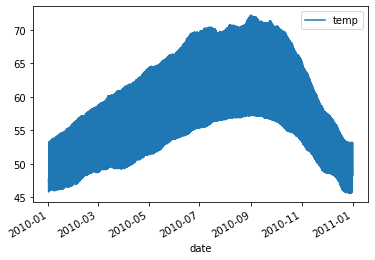

In [26]:
# plots temperature against time which is the x-axis
temps.plot()

<AxesSubplot:xlabel='date'>

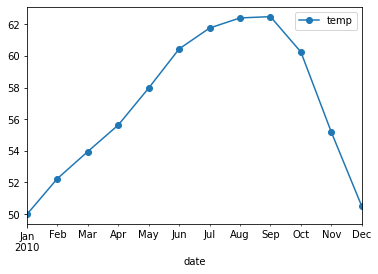

In [27]:
# plots resampled data grouped into months for the average temperature
temps.resample('m').mean().plot(marker='o')

,temp,rolling_3,rolling_5,rolling_7
date,,,,
2010-01-03,49.288889,NaN,NaN,NaN
2010-01-10,49.507143,NaN,NaN,NaN
2010-01-17,49.829167,49.541733,NaN,NaN
2010-01-24,50.192262,49.842857,NaN,NaN
2010-01-31,50.705952,50.242460,49.904683,NaN
2010-02-07,51.338690,50.745635,50.314643,NaN
2010-02-14,52.095238,51.379960,50.832262,50.422477
2010-02-21,52.630357,52.021429,51.392500,50.899830
2010-02-28,52.911310,52.545635,51.936310,51.386139


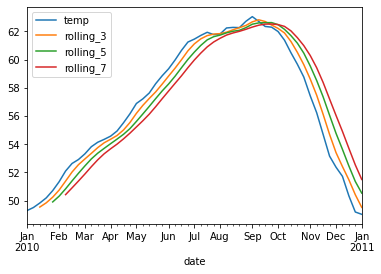

In [29]:
# uses .rolling to calculate rolling averages over a restricted time periods like the past 3 days, 5 days, or a week
rolling_df = temps.resample('W').mean().assign(
    rolling_3=lambda temps: temps.temp.rolling(3).mean(),
    rolling_5=lambda temps: temps.temp.rolling(5).mean(),
    rolling_7=lambda temps: temps.temp.rolling(7).mean(),
)
rolling_df.plot()
rolling_df.head(20)


In [31]:
# shifts the data to the forward or backward by that many dates; gets the difference between a previous or further back observation 
temps['shift(-1)'] = temps.temp.shift(-1)
temps['shift(1)'] = temps.temp.shift(1)
temps['shift(3)'] = temps.temp.shift(3)
temps['diff(1)'] = temps.temp.diff(1)
temps['diff(3)'] = temps.temp.diff(3)
temps.head(25)


,temp,shift(-1),shift(1),shift(3),diff(1),diff(3)
date,,,,,,
2010-01-01 00:00:00,47.8,47.4,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,47.4,46.9,47.8,NaN,-0.4,NaN
2010-01-01 02:00:00,46.9,46.5,47.4,NaN,-0.5,NaN
2010-01-01 03:00:00,46.5,46.0,46.9,47.8,-0.4,-1.3
2010-01-01 04:00:00,46.0,45.8,46.5,47.4,-0.5,-1.4
2010-01-01 05:00:00,45.8,45.9,46.0,46.9,-0.2,-1.1
2010-01-01 06:00:00,45.9,45.9,45.8,46.5,0.1,-0.6
2010-01-01 07:00:00,45.9,46.4,45.9,46.0,0.0,-0.1
2010-01-01 08:00:00,46.4,48.0,45.9,45.8,0.5,0.6


In [32]:
# cleanup the additional columns
for col in ['shift(-1)', 'shift(1)', 'shift(3)', 'diff(1)', 'diff(3)']:
    del temps[col]


In [34]:
temps

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


## Exercises

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:title={'center':'Avg Daily Temps'}, xlabel='date'>

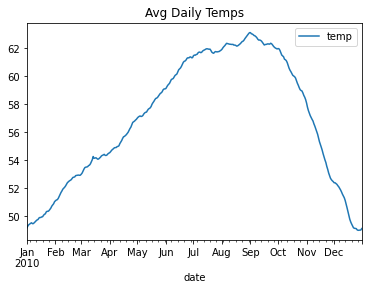

In [46]:
# resamples by the dy and takes the average temperature and plots it

temps.resample('d').mean().plot(title='Avg Daily Temps')

2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:title={'center':'Lowest Daily Temps'}, xlabel='date'>

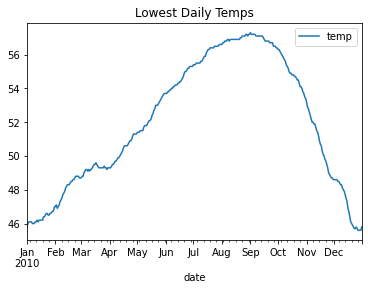

In [47]:
temps.resample('d').min().plot(title='Lowest Daily Temps')

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:title={'center':'Highest Daily Temps'}, xlabel='date'>

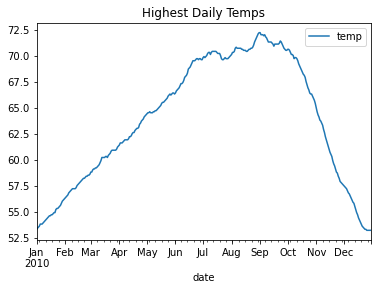

In [48]:
temps.resample('d').max().plot(title='Highest Daily Temps')

4. Which month is the coldest, on average?

In [50]:
temps['month'] = temps.index.strftime('%m-%b')
temps.head()

,temp,month
date,,
2010-01-01 00:00:00,47.8,01-Jan
2010-01-01 01:00:00,47.4,01-Jan
2010-01-01 02:00:00,46.9,01-Jan
2010-01-01 03:00:00,46.5,01-Jan
2010-01-01 04:00:00,46.0,01-Jan


5. Which month has the highest average temperature?

In [41]:
rain = data.seattle_weather()

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

1. Which year and month combination has the highest amount of precipitation?

2. Visualize the amount of monthly precipitation over time.

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

4. Which year-month combination is the windiest?

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

6. In which month does it rain the most?

7. Which month has the most number of days with a non-zero amount of precipitation?

In [42]:
air = data.flights_20k()

1. Convert any negative delays to 0.

2. Which hour of the day has the highest average delay?

3. Does the day of the week make a difference in the delay amount?

4. Does the month make a difference in the delay amount?

#### Bonus

In [43]:
nrg = data.iowa_electricity()

1. For each row, calculate the percentage of the year's total that energy source provided.
2. Lineplot of generation over time, color by source
3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
5. Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
- express each number as a % of the year's total

In [44]:
temp = data.sf_temps()

1. Use the sf_temps dataset

2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

4. Create pretty labels for time plots

5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar